# 2. 이변량 데이터 탐색

데이터 탐색에는 하나의 변수 뿐 아니라 두개 이상의 변수간 탐색도 필요하다. 특히 독립변수와 종속 변수간의 예측 문제인 지도학습의 경우 선형성 여부를 판단하는 과정이 반드시 필요하기 때문이다.
**판다스에서는 corr() 함수**를 통해 두 변수간 상관계수를 파악 하도록 돕고 있다.

In [4]:
## data.corr()
import pandas as pd
data = pd.read_csv('./extrafiles/Ex_CEOSalary.csv', encoding='utf-8')

data.corr()

,salary,sales,roe,industry
salary,1.000000,0.119869,0.114842,-0.015725
sales,0.119869,1.000000,-0.055386,-0.100284
roe,0.114842,-0.055386,1.000000,-0.011833
industry,-0.015725,-0.100284,-0.011833,1.000000


결과는, 우리가 독립변수로 인지한 sales 와 roe, 그리고 종속 변수인 salary 간의 상관계수를 확인 할 수 있다. 결과를 확인하면, <u>sales 와 salary 두 변수간의 상관 계수는 0.120 으로 상관관계가 낮은 수준이다. 하지만 이는 이상치를 제거 하지 않은 결과 이므로 데이터 정제작업 이후 다시 확인</u> 할 필요가 있다.

※ **상관계수**는 두 변수간의 상관관계가 존재하는지에 대한 지표로. **양의 상관관계, 음의 상관관계 그리고 아무런 상관관계가 없는 경우 0**으로 표기된다. 고로 0에 가까울수록 두 변수간의 상관관계가 떨어진다고 볼 수 있다.


In [6]:
# 피어슨 상관계수를 이용한 상관계수
data.corr(method="pearson")

,salary,sales,roe,industry
salary,1.000000,0.119869,0.114842,-0.015725
sales,0.119869,1.000000,-0.055386,-0.100284
roe,0.114842,-0.055386,1.000000,-0.011833
industry,-0.015725,-0.100284,-0.011833,1.000000


In [7]:
# 스피어만 상관계수를 이용한 상관계수
data.corr(method="spearman")

,salary,sales,roe,industry
salary,1.000000,0.528016,0.205984,-0.203598
sales,0.528016,1.000000,-0.170548,-0.107410
roe,0.205984,-0.170548,1.000000,-0.080250
industry,-0.203598,-0.107410,-0.080250,1.000000


In [8]:
# 켄달 상관계수를 이용한 상관계수
data.corr(method="kendall")

,salary,sales,roe,industry
salary,1.000000,0.363921,0.143672,-0.141304
sales,0.363921,1.000000,-0.123844,-0.080984
roe,0.143672,-0.123844,1.000000,-0.054290
industry,-0.141304,-0.080984,-0.054290,1.000000


두 연속형 변수간의 **상관계수는 이 외에도 산점도(scatter plot)을 활용하여 확인**하는 것도 좋은 방법이다.

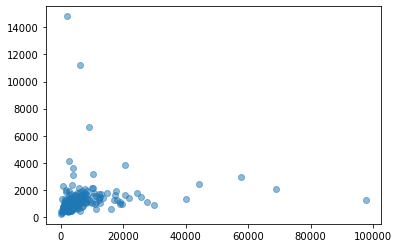

In [9]:
# 삼점도를 이용한 두 변수간 상관관계 예시
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5) # alpha 값은 불투명도를 의미한다.
plt.show()

위 결과를 통해 sales 와 salary 의 특정 몇몇 의 값이 이상치로 작용하고 있음을 확인 할 수 있다.

<function matplotlib.pyplot.show(close=None, block=None)>

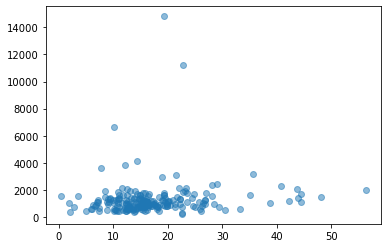

In [13]:
plt.scatter(data['roe'], data['salary'], alpha=0.5) # alpha 값은 불투명도를 의미한다.
plt.show

해당 결과 역시 몇몇 이상 값의 존재를 확인 할 수 있다.  

다음으로는 산업 범주별로 종속변수인 salary 와의 평균 및 기술통계량을 확인하기 위하여 **groupby 함수**를 활용 해본다.

In [14]:
# industry 값을 기준으로 salary 값의 기술 통계량을 조회한다.
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
1          72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   
2          46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
3          60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
4          31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   

                   
              max  
industry           
1          3844.0  
2          6640.0  
3         14822.0  
4          1100.0